In [1]:
import numpy as np
import pandas as pd
import os
import matplotlib.pyplot as plt

%matplotlib inline

In [2]:
# Band2 Video

# method = "livo"
method = "livo_nocull"

path = f"/datassd/pipeline_cpp/server_tiled/e2e_latency/{method}/"
sender_file = os.path.join(path, '0_start_frame_sender_timestamp.txt')
receiver_file = os.path.join(path, '0_end_frame_recveiver_timestamp.txt')

load_frame_file = os.path.join(path, '0_load_frame_sender_latency.txt')
update_view_file = os.path.join(path, '0_update_view_sender_latency.txt')
send_frame_file = os.path.join(path, '0_send_frame_sender_latency.txt')

load_frame_process_file = os.path.join(path, '0_load_frame_sender_processing_time.txt')
update_view_process_file = os.path.join(path, '0_update_view_sender_processing_time.txt')
send_frame_process_file = os.path.join(path, '0_send_frame_sender_processing_time.txt')

recv_frame_file = os.path.join(path, '0_recv_frame_receiver_latency.txt')
update_ptcl_file = os.path.join(path, '0_update_ptcl_receiver_latency.txt')
render_ptcl_file = os.path.join(path, '0_render_ptcl_receiver_latency.txt')

recv_frame_process_file = os.path.join(path, '0_recv_frame_receiver_processing_time.txt')
update_ptcl_process_file = os.path.join(path, '0_update_ptcl_receiver_processing_time.txt')
render_ptcl_process_file = os.path.join(path, '0_render_ptcl_receiver_processing_time.txt')

webrtc_color_sender_file = os.path.join(path, '0_c_webrtc_sender_timestamp.txt')
webrtc_color_receiver_file = os.path.join(path, '0_c_webrtc_receiver_timestamp.txt')
webrtc_depth_sender_file = os.path.join(path, '0_d_yuv16_webrtc_sender_timestamp.txt')
webrtc_depth_receiver_file = os.path.join(path, '0_d_yuv16_webrtc_receiver_timestamp.txt')

send_df = pd.read_csv(sender_file)
recv_df = pd.read_csv(receiver_file)

load_frame_df = pd.read_csv(load_frame_file)
update_view_df = pd.read_csv(update_view_file)
send_frame_df = pd.read_csv(send_frame_file)

recv_frame_df = pd.read_csv(recv_frame_file)
update_ptcl_df = pd.read_csv(update_ptcl_file)
render_ptcl_df = pd.read_csv(render_ptcl_file)

load_frame_process_df = pd.read_csv(load_frame_process_file)
update_view_process_df = pd.read_csv(update_view_process_file)
send_frame_process_df = pd.read_csv(send_frame_process_file)

recv_frame_process_df = pd.read_csv(recv_frame_process_file)
update_ptcl_process_df = pd.read_csv(update_ptcl_process_file)
render_ptcl_process_df = pd.read_csv(render_ptcl_process_file)

webrtc_color_sender_df = pd.read_csv(webrtc_color_sender_file)
webrtc_depth_sender_df = pd.read_csv(webrtc_depth_sender_file)
webrtc_color_receiver_df = pd.read_csv(webrtc_color_receiver_file)
webrtc_depth_receiver_df = pd.read_csv(webrtc_depth_receiver_file)

In [3]:
merged_e2e_df = pd.merge(send_df, recv_df, on='FrameID')

# Rename columns
merged_e2e_df.columns = ['FrameID', 'SenderTimestamp', 'ReceiverTimestamp']
merged_e2e_df["E2ELatency"] = merged_e2e_df["ReceiverTimestamp"] - merged_e2e_df["SenderTimestamp"]

merged_sender_stages_df = pd.merge(load_frame_df, update_view_df, on='FrameID')
merged_sender_stages_df.columns = ['FrameID', 'LoadFrameTime', 'UpdateViewTime']

merged_sender_stages_df = pd.merge(merged_sender_stages_df, send_frame_df, on='FrameID')
merged_sender_stages_df.columns = ['FrameID', 'LoadFrameTime', 'UpdateViewTime', 'SendFrameTime']

merged_receiver_stages_df = pd.merge(recv_frame_df, update_ptcl_df, on='FrameID')
merged_receiver_stages_df.columns = ['FrameID', 'RecvFrameTime', 'UpdatePtclTime']

merged_receiver_stages_df = pd.merge(merged_receiver_stages_df, render_ptcl_df, on='FrameID')
merged_receiver_stages_df.columns = ['FrameID', 'RecvFrameTime', 'UpdatePtclTime', 'RenderPtclTime']

merged_stages_df = pd.merge(merged_sender_stages_df, merged_receiver_stages_df, on='FrameID')

merged_sender_process_df = pd.merge(load_frame_process_df, update_view_process_df, on='FrameID')
merged_sender_process_df.columns = ['FrameID', 'LoadFrameProcessTime', 'UpdateViewProcessTime']

merged_sender_process_df = pd.merge(merged_sender_process_df, send_frame_process_df, on='FrameID')
merged_sender_process_df.columns = ['FrameID', 'LoadFrameProcessTime', 'UpdateViewProcessTime', 'SendFrameProcessTime']

merged_receiver_process_df = pd.merge(recv_frame_process_df, update_ptcl_process_df, on='FrameID')
merged_receiver_process_df.columns = ['FrameID', 'RecvFrameProcessTime', 'UpdatePtclProcessTime']

merged_receiver_process_df = pd.merge(merged_receiver_process_df, render_ptcl_process_df, on='FrameID')
merged_receiver_process_df.columns = ['FrameID', 'RecvFrameProcessTime', 'UpdatePtclProcessTime', 'RenderPtclProcessTime']

merged_webrtc_df = pd.merge(webrtc_color_sender_df, webrtc_color_receiver_df, on='FrameID')
merged_webrtc_df.columns = ['FrameID', 'ColorSenderTimestamp', 'ColorReceiverTimestamp']
merged_webrtc_df["ColorWebRTCLatency"] = merged_webrtc_df["ColorReceiverTimestamp"] - merged_webrtc_df["ColorSenderTimestamp"]

merged_webrtc_df = pd.merge(merged_webrtc_df, webrtc_depth_sender_df, on='FrameID')
merged_webrtc_df.columns = ['FrameID', 'ColorSenderTimestamp', 'ColorReceiverTimestamp', 'ColorWebRTCLatency', 'DepthSenderTimestamp']
merged_webrtc_df = pd.merge(merged_webrtc_df, webrtc_depth_receiver_df, on='FrameID')
merged_webrtc_df.columns = ['FrameID', 'ColorSenderTimestamp', 'ColorReceiverTimestamp', 'ColorWebRTCLatency', 'DepthSenderTimestamp', 'DepthReceiverTimestamp']
merged_webrtc_df["DepthWebRTCLatency"] = merged_webrtc_df["DepthReceiverTimestamp"] - merged_webrtc_df["DepthSenderTimestamp"]

OFFSET = 500 # First 500 frames

In [4]:
merged_receiver_stages_df

,FrameID,RecvFrameTime,UpdatePtclTime,RenderPtclTime
0,2,1603,1649,1662
1,3,20,43,41
2,4,56,25,33
3,5,40,31,29
4,6,37,37,32
...,...,...,...,...
5499,5512,34,34,35
5500,5513,40,42,42
5501,5514,30,31,28
5502,5515,36,34,36


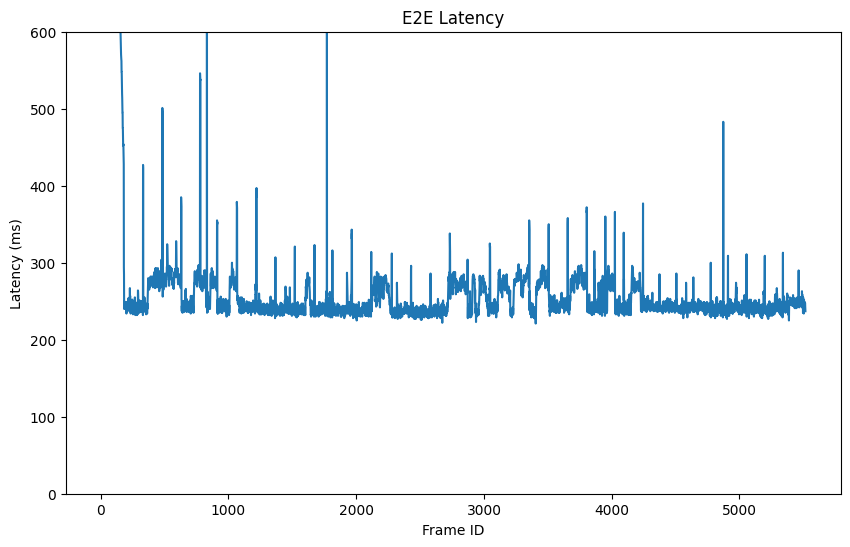

Avg. E2E Latency:  251.54636290967227


,FrameID,SenderTimestamp,ReceiverTimestamp,E2ELatency
500,510,1738184586614,1738184586896,282
501,511,1738184586646,1738184586928,282
502,512,1738184586682,1738184586951,269
503,513,1738184586716,1738184586987,271
504,514,1738184586744,1738184587020,276
...,...,...,...,...
5499,5512,1738184757722,1738184757962,240
5500,5513,1738184757756,1738184758004,248
5501,5514,1738184757791,1738184758033,242
5502,5515,1738184757829,1738184758070,241


In [5]:
# Plot E2E latency
plt.figure(figsize=(10, 6))
plt.plot(merged_e2e_df["FrameID"], merged_e2e_df["E2ELatency"], label="E2E Latency")
plt.title("E2E Latency")
plt.ylabel("Latency (ms)")
plt.xlabel("Frame ID")
plt.ylim(0, 600)
plt.show()

# Print avg. E2E latency, skip first 10 frames
# merged_e2e_df = merged_e2e_df[10:]
print("Avg. E2E Latency: ", np.mean(merged_e2e_df[OFFSET:]["E2ELatency"]))

merged_e2e_df[OFFSET:]

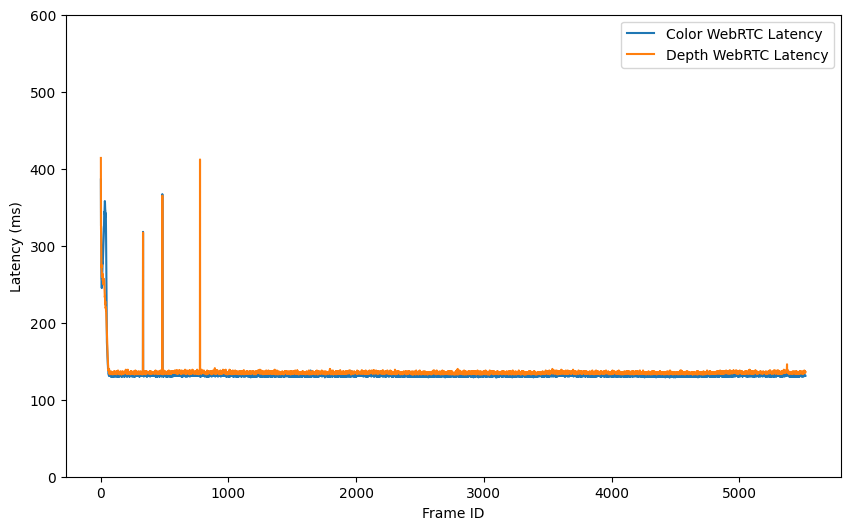

Avg. Color WebRTC Latency:  131.13386613386612
Avg. Depth WebRTC Latency:  135.23856143856145


,FrameID,ColorSenderTimestamp,ColorReceiverTimestamp,ColorWebRTCLatency,DepthSenderTimestamp,DepthReceiverTimestamp,DepthWebRTCLatency
0,2,1738184570727,1738184571113,386,1738184570689,1738184571103,414
1,3,1738184570794,1738184571120,326,1738184570799,1738184571121,322
2,4,1738184570803,1738184571128,325,1738184570814,1738184571126,312
3,5,1738184570814,1738184571136,322,1738184570827,1738184571132,305
4,6,1738184570889,1738184571146,257,1738184570878,1738184571150,272
...,...,...,...,...,...,...,...
5500,5513,1738184757821,1738184757953,132,1738184757823,1738184757960,137
5501,5514,1738184757855,1738184757986,131,1738184757853,1738184757990,137
5502,5515,1738184757888,1738184758019,131,1738184757893,1738184758028,135
5503,5516,1738184757921,1738184758052,131,1738184757926,1738184758061,135


In [6]:
# Plot WebRTC latency
plt.figure(figsize=(10, 6))
plt.plot(merged_webrtc_df["FrameID"], merged_webrtc_df["ColorWebRTCLatency"], label="Color WebRTC Latency")
plt.plot(merged_webrtc_df["FrameID"], merged_webrtc_df["DepthWebRTCLatency"], label="Depth WebRTC Latency")
plt.ylabel("Latency (ms)")
plt.xlabel("Frame ID")
plt.ylim(0, 600)
plt.legend()
plt.show()

# Print avg. WebRTC latency, skip first OFFSET frames
print("Avg. Color WebRTC Latency: ", np.mean(merged_webrtc_df[OFFSET:]["ColorWebRTCLatency"]))
print("Avg. Depth WebRTC Latency: ", np.mean(merged_webrtc_df[OFFSET:]["DepthWebRTCLatency"]))

merged_webrtc_df

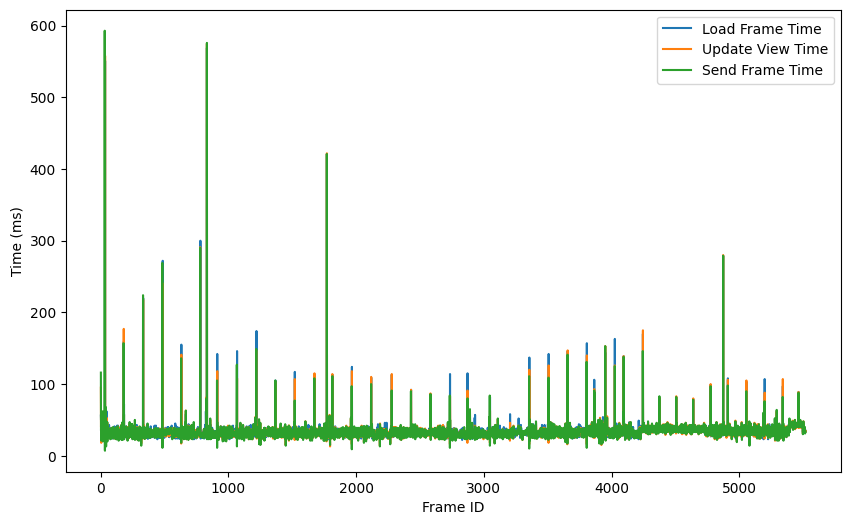

,FrameID,LoadFrameTime,UpdateViewTime,SendFrameTime
0,2,56,95,116
1,3,50,40,35
2,4,54,52,51
3,5,27,18,21
4,6,31,27,25
...,...,...,...,...
5511,5513,34,39,40
5512,5514,37,32,31
5513,5515,35,36,35
5514,5516,34,33,35


In [7]:
# Plot sender stages
plt.figure(figsize=(10, 6))
plt.plot(merged_sender_stages_df["FrameID"], merged_sender_stages_df["LoadFrameTime"], label="Load Frame Time")
plt.plot(merged_sender_stages_df["FrameID"], merged_sender_stages_df["UpdateViewTime"], label="Update View Time")
plt.plot(merged_sender_stages_df["FrameID"], merged_sender_stages_df["SendFrameTime"], label="Send Frame Time")
plt.ylabel("Time (ms)")
plt.xlabel("Frame ID")
plt.legend()
plt.show()

merged_sender_stages_df

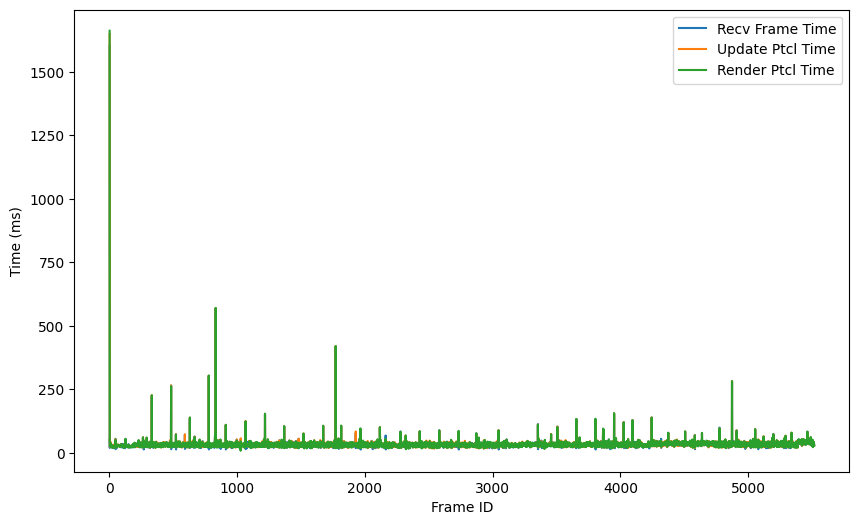

,FrameID,RecvFrameTime,UpdatePtclTime,RenderPtclTime
0,2,1603,1649,1662
1,3,20,43,41
2,4,56,25,33
3,5,40,31,29
4,6,37,37,32
...,...,...,...,...
5499,5512,34,34,35
5500,5513,40,42,42
5501,5514,30,31,28
5502,5515,36,34,36


In [8]:
# Plot receiver stages
plt.figure(figsize=(10, 6))
plt.plot(merged_receiver_stages_df["FrameID"], merged_receiver_stages_df["RecvFrameTime"], label="Recv Frame Time")
plt.plot(merged_receiver_stages_df["FrameID"], merged_receiver_stages_df["UpdatePtclTime"], label="Update Ptcl Time")
plt.plot(merged_receiver_stages_df["FrameID"], merged_receiver_stages_df["RenderPtclTime"], label="Render Ptcl Time")
plt.ylabel("Time (ms)")
plt.xlabel("Frame ID")
plt.legend()
plt.show()

merged_receiver_stages_df

In [9]:
merged_stages_df

,FrameID,LoadFrameTime,UpdateViewTime,SendFrameTime,RecvFrameTime,UpdatePtclTime,RenderPtclTime
0,2,56,95,116,1603,1649,1662
1,3,50,40,35,20,43,41
2,4,54,52,51,56,25,33
3,5,27,18,21,40,31,29
4,6,31,27,25,37,37,32
...,...,...,...,...,...,...,...
5499,5512,34,33,33,34,34,35
5500,5513,34,39,40,40,42,42
5501,5514,37,32,31,30,31,28
5502,5515,35,36,35,36,34,36


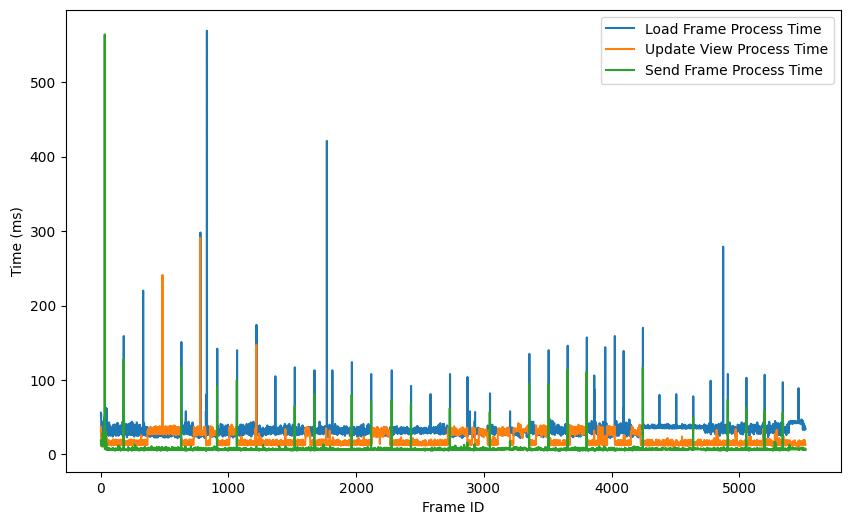

,FrameID,LoadFrameProcessTime,UpdateViewProcessTime,SendFrameProcessTime
0,2,56,37,19
1,3,50,28,12
2,4,54,27,12
3,5,27,18,15
4,6,31,13,13
...,...,...,...,...
5511,5513,34,19,7
5512,5514,37,13,7
5513,5515,35,13,6
5514,5516,34,13,8


In [10]:
# Plot sender processing time
plt.figure(figsize=(10, 6))
plt.plot(merged_sender_process_df["FrameID"], merged_sender_process_df["LoadFrameProcessTime"], label="Load Frame Process Time")
plt.plot(merged_sender_process_df["FrameID"], merged_sender_process_df["UpdateViewProcessTime"], label="Update View Process Time")
plt.plot(merged_sender_process_df["FrameID"], merged_sender_process_df["SendFrameProcessTime"], label="Send Frame Process Time")
plt.ylabel("Time (ms)")
plt.xlabel("Frame ID")
plt.legend()
plt.show()

merged_sender_process_df

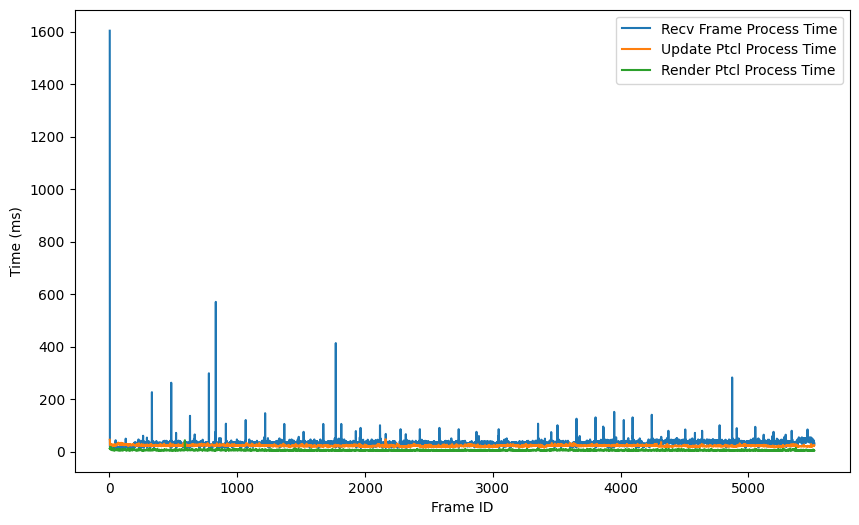

,FrameID,RecvFrameTime,UpdatePtclTime,RenderPtclTime
0,2,1603,1649,1662
1,3,20,43,41
2,4,56,25,33
3,5,40,31,29
4,6,37,37,32
...,...,...,...,...
5499,5512,34,34,35
5500,5513,40,42,42
5501,5514,30,31,28
5502,5515,36,34,36


In [11]:
# Plot receiver processing time
plt.figure(figsize=(10, 6))
plt.plot(merged_receiver_process_df["FrameID"], merged_receiver_process_df["RecvFrameProcessTime"], label="Recv Frame Process Time")
plt.plot(merged_receiver_process_df["FrameID"], merged_receiver_process_df["UpdatePtclProcessTime"], label="Update Ptcl Process Time")
plt.plot(merged_receiver_process_df["FrameID"], merged_receiver_process_df["RenderPtclProcessTime"], label="Render Ptcl Process Time")
plt.ylabel("Time (ms)")
plt.xlabel("Frame ID")
plt.legend()
plt.show()

merged_receiver_stages_df

In [12]:
merged_webrtc_df

,FrameID,ColorSenderTimestamp,ColorReceiverTimestamp,ColorWebRTCLatency,DepthSenderTimestamp,DepthReceiverTimestamp,DepthWebRTCLatency
0,2,1738184570727,1738184571113,386,1738184570689,1738184571103,414
1,3,1738184570794,1738184571120,326,1738184570799,1738184571121,322
2,4,1738184570803,1738184571128,325,1738184570814,1738184571126,312
3,5,1738184570814,1738184571136,322,1738184570827,1738184571132,305
4,6,1738184570889,1738184571146,257,1738184570878,1738184571150,272
...,...,...,...,...,...,...,...
5500,5513,1738184757821,1738184757953,132,1738184757823,1738184757960,137
5501,5514,1738184757855,1738184757986,131,1738184757853,1738184757990,137
5502,5515,1738184757888,1738184758019,131,1738184757893,1738184758028,135
5503,5516,1738184757921,1738184758052,131,1738184757926,1738184758061,135


In [13]:
merged_sender_process_df

,FrameID,LoadFrameProcessTime,UpdateViewProcessTime,SendFrameProcessTime
0,2,56,37,19
1,3,50,28,12
2,4,54,27,12
3,5,27,18,15
4,6,31,13,13
...,...,...,...,...
5511,5513,34,19,7
5512,5514,37,13,7
5513,5515,35,13,6
5514,5516,34,13,8


In [14]:
# Ignore the first few frames

merged_sender_stages_df = merged_sender_stages_df[OFFSET:]
merged_receiver_stages_df = merged_receiver_stages_df[OFFSET:]
merged_sender_process_df = merged_sender_process_df[OFFSET:]
merged_receiver_process_df = merged_receiver_process_df[OFFSET:]
merged_webrtc_df = merged_webrtc_df[OFFSET:]
merged_e2e_df = merged_e2e_df[OFFSET:]

print("Mean E2E Latency: ", merged_e2e_df['E2ELatency'].mean())
print("Mean Color WebRTC Latency: ", merged_webrtc_df['ColorWebRTCLatency'].mean())
print("Mean Depth WebRTC Latency: ", merged_webrtc_df['DepthWebRTCLatency'].mean())

print("Mean Load Frame Time: ", merged_sender_stages_df['LoadFrameTime'].mean())
print("Mean Update View Time: ", merged_sender_stages_df['UpdateViewTime'].mean())
print("Mean Send Frame Time: ", merged_sender_stages_df['SendFrameTime'].mean())

print("Mean Recv Frame Time: ", merged_receiver_stages_df['RecvFrameTime'].mean())
print("Mean Update Ptcl Time: ", merged_receiver_stages_df['UpdatePtclTime'].mean())
print("Mean Render Ptcl Time: ", merged_receiver_stages_df['RenderPtclTime'].mean())

total_latency = merged_sender_stages_df['LoadFrameTime'] + merged_sender_stages_df['UpdateViewTime'] + merged_sender_stages_df['SendFrameTime'] + merged_receiver_stages_df['RecvFrameTime'] + merged_receiver_stages_df['UpdatePtclTime'] + merged_receiver_stages_df['RenderPtclTime'] + merged_webrtc_df['ColorWebRTCLatency']/2.0 + merged_webrtc_df['DepthWebRTCLatency']/2.0

print("Mean Total Latency: ", total_latency.mean(), "std: ", total_latency.std())

print("-----------------------------------------------------------\n")

print(f"Load Frame Process Time: Mean = {merged_sender_process_df['LoadFrameProcessTime'].mean():.2f}, Std = {merged_sender_process_df['LoadFrameProcessTime'].std():.2f}")
print(f"Update View Process Time: Mean = {merged_sender_process_df['UpdateViewProcessTime'].mean():.2f}, Std = {merged_sender_process_df['UpdateViewProcessTime'].std():.2f}")
print(f"Send Frame Process Time: Mean = {merged_sender_process_df['SendFrameProcessTime'].mean():.2f}, Std = {merged_sender_process_df['SendFrameProcessTime'].std():.2f}")

print(f"Recv Frame Process Time: Mean = {merged_receiver_process_df['RecvFrameProcessTime'].mean():.2f}, Std = {merged_receiver_process_df['RecvFrameProcessTime'].std():.2f}")
print(f"Update Ptcl Process Time: Mean = {merged_receiver_process_df['UpdatePtclProcessTime'].mean():.2f}, Std = {merged_receiver_process_df['UpdatePtclProcessTime'].std():.2f}")
print(f"Render Ptcl Process Time: Mean = {merged_receiver_process_df['RenderPtclProcessTime'].mean():.2f}, Std = {merged_receiver_process_df['RenderPtclProcessTime'].std():.2f}")

total_proceessing_time = merged_sender_process_df['LoadFrameProcessTime'] + merged_sender_process_df['UpdateViewProcessTime'] + merged_sender_process_df['SendFrameProcessTime'] + merged_receiver_process_df['RecvFrameProcessTime'] + merged_receiver_process_df['UpdatePtclProcessTime'] + merged_receiver_process_df['RenderPtclProcessTime']

print(f"Total Processing Latency: Mean = {total_proceessing_time.mean():.2f}, Std = {total_proceessing_time.std():.2f}")

webrtc_latency = merged_webrtc_df['ColorWebRTCLatency']/2.0 + merged_webrtc_df['DepthWebRTCLatency']/2.0
print(f"WebRTC Latency: Mean = {webrtc_latency.mean():.2f}, Std = {webrtc_latency.std():.2f}")
print(f"E2E Latency: Mean = {merged_e2e_df['E2ELatency'].mean():.2f}, Std = {merged_e2e_df['E2ELatency'].std():.2f}")


Mean E2E Latency:  251.54636290967227
Mean Color WebRTC Latency:  131.13386613386612
Mean Depth WebRTC Latency:  135.23856143856145
Mean Load Frame Time:  33.697966507177036
Mean Update View Time:  33.68959330143541
Mean Send Frame Time:  33.71052631578947
Mean Recv Frame Time:  33.72022382094325
Mean Update Ptcl Time:  33.7240207833733
Mean Render Ptcl Time:  33.66286970423661
Mean Total Latency:  335.3819944044764 std:  57.89376564604138
-----------------------------------------------------------

Load Frame Process Time: Mean = 32.75, Std = 13.81
Update View Process Time: Mean = 19.50, Std = 8.93
Send Frame Process Time: Mean = 7.16, Std = 5.08
Recv Frame Process Time: Mean = 31.74, Std = 14.24
Update Ptcl Process Time: Mean = 21.80, Std = 2.47
Render Ptcl Process Time: Mean = 5.16, Std = 1.32
Total Processing Latency: Mean = 118.12, Std = 21.36
WebRTC Latency: Mean = 133.19, Std = 2.13
E2E Latency: Mean = 251.55, Std = 23.32


In [15]:
merged_stages_df = pd.merge(merged_sender_process_df, merged_receiver_process_df, on='FrameID')
merged_webrtc_df["WebRTCLatency"] = merged_webrtc_df['ColorWebRTCLatency']/2.0 + merged_webrtc_df['DepthWebRTCLatency']/2.0
merged_stages_df = pd.merge(merged_stages_df, merged_webrtc_df, on='FrameID')

merged_stages_df

/tmp/ipykernel_21718/1037489580.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  merged_webrtc_df["WebRTCLatency"] = merged_webrtc_df['ColorWebRTCLatency']/2.0 + merged_webrtc_df['DepthWebRTCLatency']/2.0


,FrameID,LoadFrameProcessTime,UpdateViewProcessTime,SendFrameProcessTime,RecvFrameProcessTime,UpdatePtclProcessTime,RenderPtclProcessTime,ColorSenderTimestamp,ColorReceiverTimestamp,ColorWebRTCLatency,DepthSenderTimestamp,DepthReceiverTimestamp,DepthWebRTCLatency,WebRTCLatency
0,510,28,32,6,30,23,7,1738184586715,1738184586845,130,1738184586720,1738184586854,134,132.0
1,511,25,27,7,31,22,7,1738184586743,1738184586875,132,1738184586748,1738184586884,136,134.0
2,512,25,28,8,25,22,4,1738184586771,1738184586904,133,1738184586776,1738184586912,136,134.5
3,513,25,28,10,25,21,7,1738184586800,1738184586933,133,1738184586805,1738184586940,135,134.0
4,514,26,37,6,35,23,6,1738184586839,1738184586971,132,1738184586840,1738184586975,135,133.5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4999,5512,34,13,7,30,21,6,1738184757783,1738184757914,131,1738184757783,1738184757920,137,134.0
5000,5513,34,19,7,40,23,5,1738184757821,1738184757953,132,1738184757823,1738184757960,137,134.5
5001,5514,37,13,7,30,22,4,1738184757855,1738184757986,131,1738184757853,1738184757990,137,134.0
5002,5515,35,13,6,34,22,5,1738184757888,1738184758019,131,1738184757893,1738184758028,135,133.0


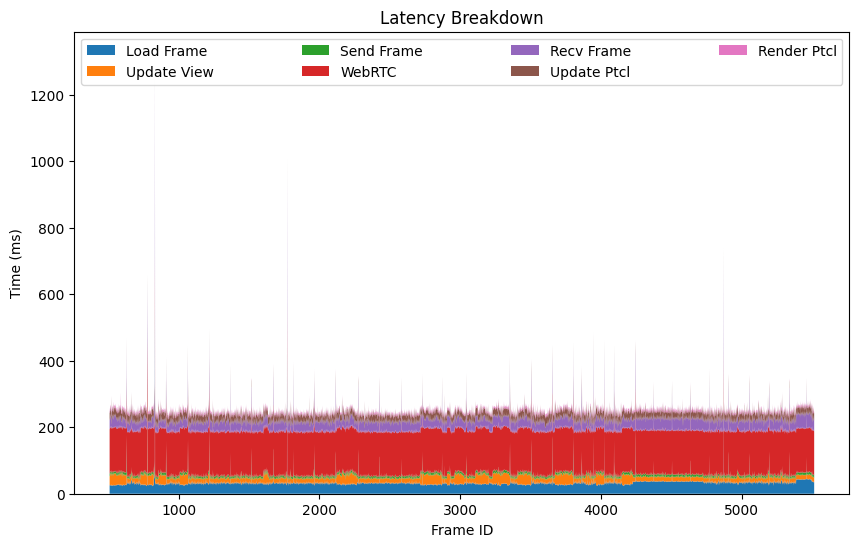

In [16]:
# Stackplot of latencies
plt.figure(figsize=(10, 6))
plt.stackplot(merged_stages_df['FrameID'], merged_stages_df['LoadFrameProcessTime'], merged_stages_df['UpdateViewProcessTime'], merged_stages_df['SendFrameProcessTime'], merged_stages_df['WebRTCLatency'], merged_stages_df['RecvFrameProcessTime'], merged_stages_df['UpdatePtclProcessTime'], merged_stages_df['RenderPtclProcessTime'], labels=['Load Frame', 'Update View', 'Send Frame', 'WebRTC', 'Recv Frame', 'Update Ptcl', 'Render Ptcl'])
plt.legend(loc='upper left', ncol=4, mode="expand")
plt.title("Latency Breakdown")
plt.ylabel("Time (ms)")
plt.xlabel("Frame ID")
plt.show()
